1. Check how long do people travel with Uber?
2. What hour do most people take uber to their destination?
3. Check the purpose of Trips?
4. Which day has the highest number of trips?
5. What are the number of trips per each day?
6. What are the trips in the month?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
data = pd.read_csv('/content/Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Check the missing values

In [3]:
data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [4]:
data.isnull().sum()

,0
START_DATE*,0
END_DATE*,1
CATEGORY*,1
START*,1
STOP*,1
MILES*,0
PURPOSE*,503


# Drop missing values from the dataset

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

,0
START_DATE*,0
END_DATE*,0
CATEGORY*,0
START*,0
STOP*,0
MILES*,0
PURPOSE*,0


In [7]:
data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1150,False,False,False,False,False,False,False
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False


In [8]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format='%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format='%m/%d/%Y %H:%M')

/tmp/ipython-input-2068878997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format='%m/%d/%Y %H:%M')
/tmp/ipython-input-2068878997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format='%m/%d/%Y %H:%M')


In [9]:
hour = []
day = []
dayofweek = []
month = []
weekday = []
for i in data['START_DATE*']:
  hour.append(i.hour)
  day.append(i.day)
  month.append(i.month)
  dayofweek.append(i.dayofweek)
  weekday.append(calendar.day_name[dayofweek[-1]])

data['Hour'] = hour
data['Day'] = day
data['Month'] = month
data['Day of Week'] = dayofweek
data['Weekday'] = weekday

/tmp/ipython-input-924637083.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = hour
/tmp/ipython-input-924637083.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day'] = day
/tmp/ipython-input-924637083.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [10]:
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Month,Day of Week,Weekday
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,12,5,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,12,5,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,12,5,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,12,5,Saturday
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,22,31,12,5,Saturday


In [11]:
# value_counts()

# Categories we have


In [12]:
data['CATEGORY*'].value_counts()

,count
CATEGORY*,
Business,647
Personal,6


In [13]:
data['Weekday'].unique()

array(['Friday', 'Saturday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday',
       'Monday'], dtype=object)

<Axes: xlabel='CATEGORY*', ylabel='count'>

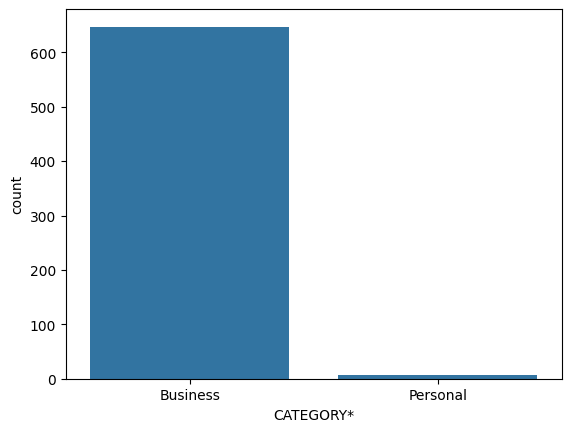

In [14]:
sns.countplot(x = 'CATEGORY*', data=data)

# 1. How long do people travel with uber

<Axes: ylabel='Frequency'>

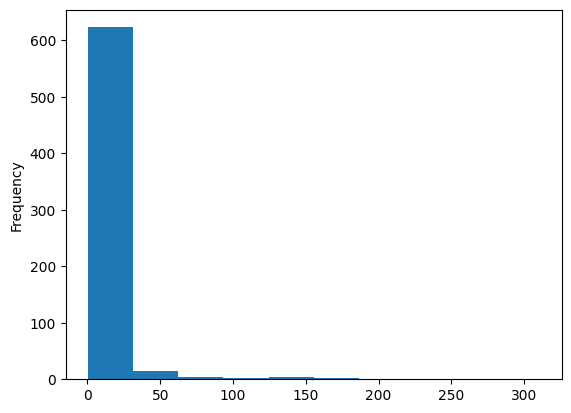

In [15]:
data['MILES*'].plot.hist()

Most people travel for a shorter distance i.e upto 35kms

In [16]:
data['Hour'].value_counts()

,count
Hour,
13,55
14,52
17,51
18,51
15,51
20,45
16,45
12,43
11,39


# 2. What hour do most people travel with uber to their destination?

Text(0.5, 1.0, 'Number of trips per hour')

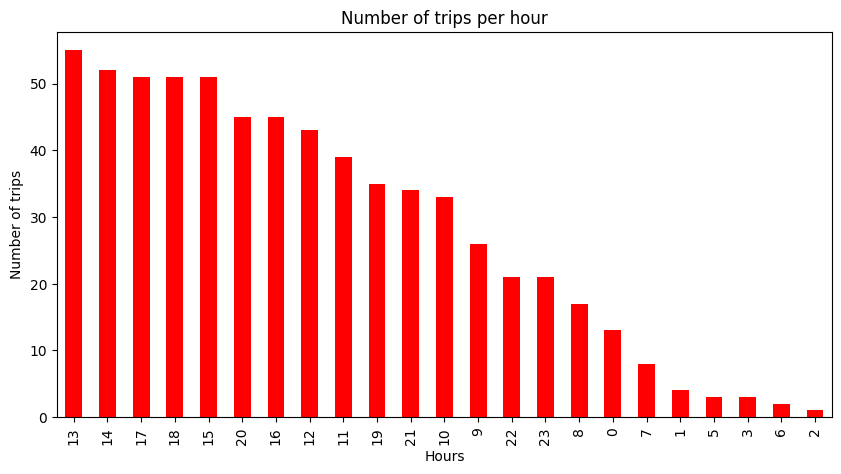

In [21]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = "bar", color = "red", figsize=(10,5))
plt.xlabel("Hours")
plt.ylabel("Number of trips")
plt.title("Number of trips per hour")

# Check the purpose of Trips?

<Axes: xlabel='PURPOSE*'>

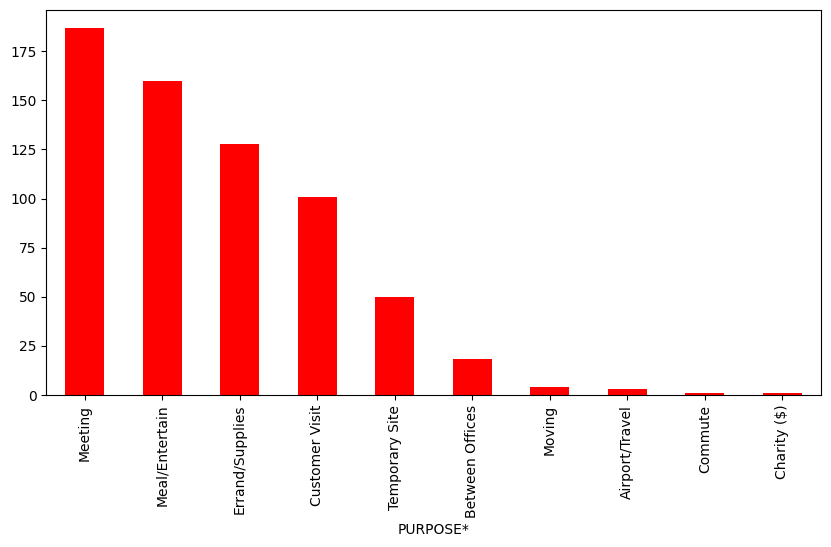

In [22]:
data['PURPOSE*'].value_counts().plot(kind = "bar", color = "red", figsize=(10,5))

# Which day has the highest number of trips?

<Axes: xlabel='Weekday'>

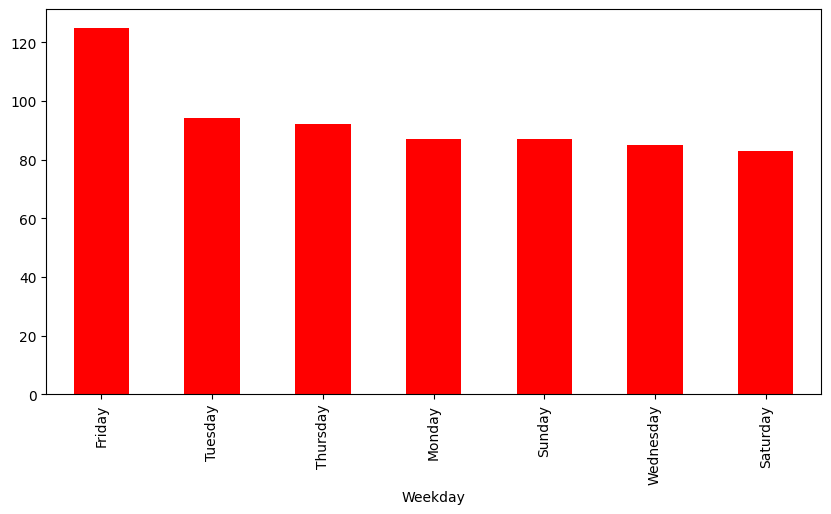

In [23]:
data['Weekday'].value_counts().plot(kind = "bar", color = "red", figsize=(10,5))

# 5. What are the number of trips per each day?

<Axes: xlabel='Day'>

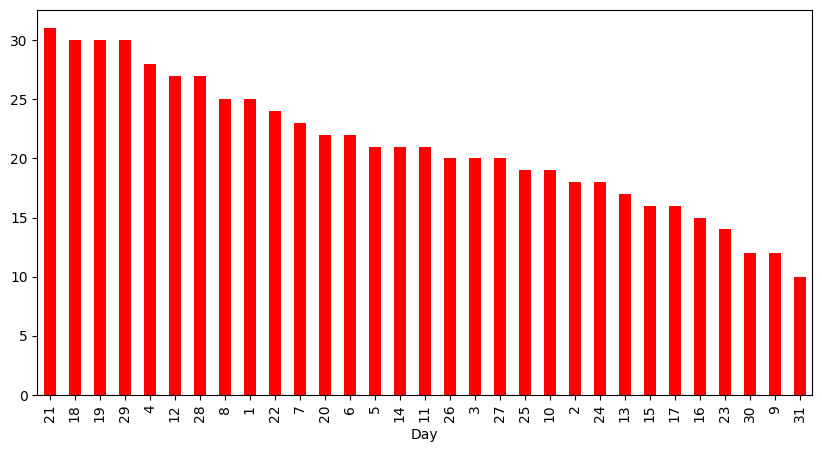

In [24]:
data['Day'].value_counts().plot(kind = "bar", color = "red", figsize=(10,5))

#6.What are the trips in the month?

<Axes: xlabel='Month'>

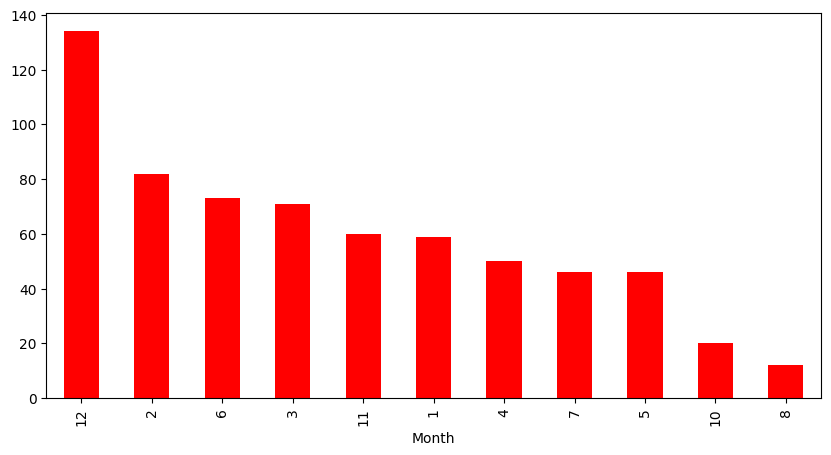

In [25]:
data['Month'].value_counts().plot(kind = "bar", color = "red", figsize=(10,5))